In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
plt.style.use('fivethirtyeight')

In [2]:
!curl -o data/output.csv https://api.covid19india.org/csv/latest/districts.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  4 2635k    4  121k    0     0  85219      0  0:00:31  0:00:01  0:00:30 85219
  7 2635k    7  204k    0     0  85165      0  0:00:31  0:00:02  0:00:29 85165
 13 2635k   13  361k    0     0   102k      0  0:00:25  0:00:03  0:00:22  102k
 21 2635k   21  559k    0     0   125k      0  0:00:21  0:00:04  0:00:17  125k
 33 2635k   33  885k    0     0   162k      0  0:00:16  0:00:05  0:00:11  184k
 45 2635k   45 1201k    0     0   185k      0  0:00:14  0:00:06  0:00:08  215k
 59 2635k   59 1565k    0     0   209k      0  0:00:12  0:00:07  0:00:05  272k
 76 2635k   76 2013k    0     0   238k      0  0:00:11  0:00:08  0:00:03  334k
 89 2635k   89 2359k    0     0   115k      0  0:00

In [3]:
from datetime import date
from datetime import timedelta
today = date.today()
yesterday = str(today - timedelta(days=1))
monthago = str(today - timedelta(days=31))
monthago

'2020-06-26'

In [4]:
try:
    df=pd.read_csv("data/output.csv")
except FileNotFoundError:
    df=pd.read_csv("data/districts.csv")
    yesterday='2020-07-15'
    monthago='2020-06-15'
    print("Couldn't find updated data, using data upto 15th July")
df['Date'] = pd.to_datetime(df["Date"])
df.sort_values(by=['Date'],inplace=True)


In [5]:
citylist=list(df["District"].unique())
citylist = [city for city in citylist if city not in {"Other Region","Unknown"}]
threshold=20
downward=[]
total=[]
for city in citylist:
    dfcity=df[df.District==city]
    state=dfcity["State"].unique()[0]
    maxval=(dfcity["Confirmed"]-dfcity["Recovered"]-dfcity["Deceased"]).max()
    if maxval<1000:
        pass
    else:
        total.append(city)
        current=dfcity[dfcity.Date==yesterday]["Confirmed"].values[0]-dfcity[dfcity.Date==yesterday]["Recovered"].values[0]-dfcity[dfcity.Date==yesterday]["Deceased"].values[0]
        if maxval==0 and current==0:
            difference=0
        else:
            difference=round(((maxval-current)/maxval)*100,2)
        if difference>threshold:
            print("State =",state,"| City =",city,"| Maxval =",maxval,"| Current =",current,"| Difference =",difference,"%")
            downward.append([state,city])
        else:
            pass
print(len(downward),"/",len(total))

State = Tamil Nadu | City = Chennai | Maxval = 24894 | Current = 13747 | Difference = 44.78 %
State = Tamil Nadu | City = Madurai | Maxval = 4199 | Current = 1952 | Difference = 53.51 %
State = Tamil Nadu | City = Vellore | Maxval = 1824 | Current = 1171 | Difference = 35.8 %
State = Tamil Nadu | City = Tiruvannamalai | Maxval = 2020 | Current = 1165 | Difference = 42.33 %
State = Tamil Nadu | City = Tenkasi | Maxval = 1047 | Current = 801 | Difference = 23.5 %
State = Tamil Nadu | City = Ramanathapuram | Maxval = 1069 | Current = 795 | Difference = 25.63 %
State = Uttar Pradesh | City = Ghaziabad | Maxval = 1560 | Current = 932 | Difference = 40.26 %
State = Uttar Pradesh | City = Gautam Buddha Nagar | Maxval = 1121 | Current = 773 | Difference = 31.04 %
State = Gujarat | City = Ahmedabad | Maxval = 5681 | Current = 3626 | Difference = 36.17 %
State = Delhi | City = Delhi | Maxval = 28329 | Current = 11904 | Difference = 57.98 %
State = Haryana | City = Gurugram | Maxval = 1998 | Curr

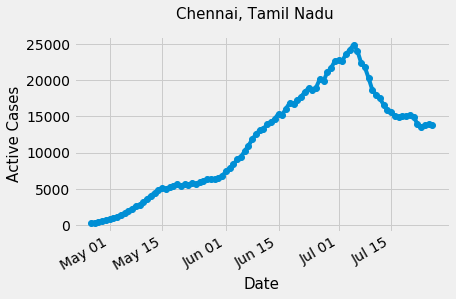

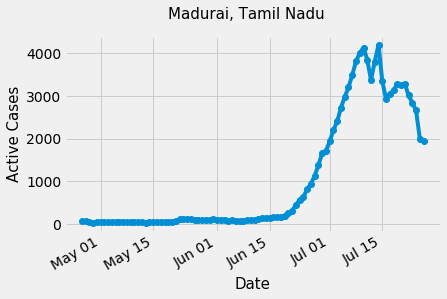

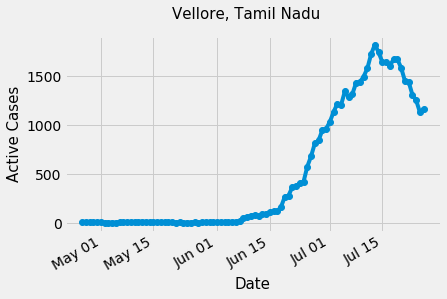

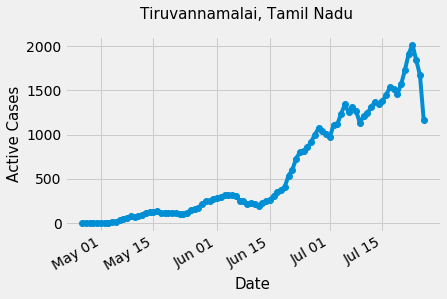

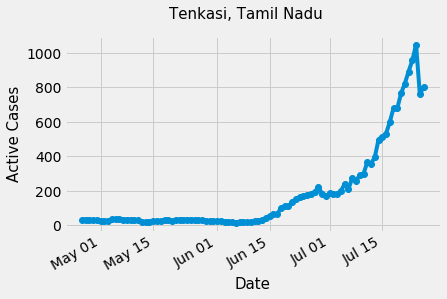

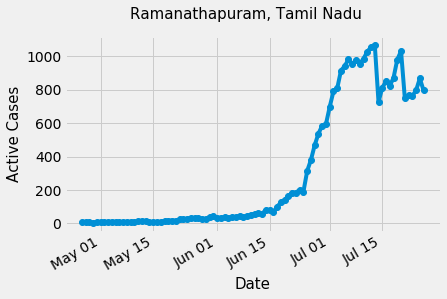

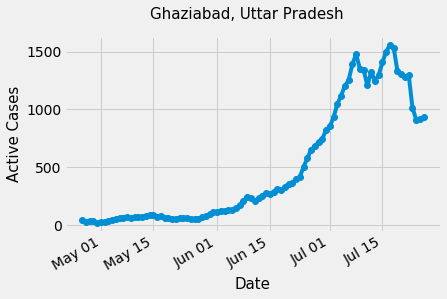

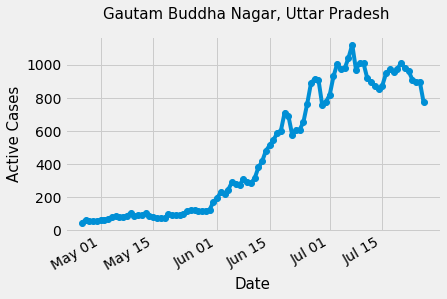

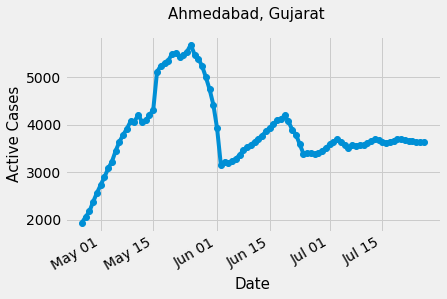

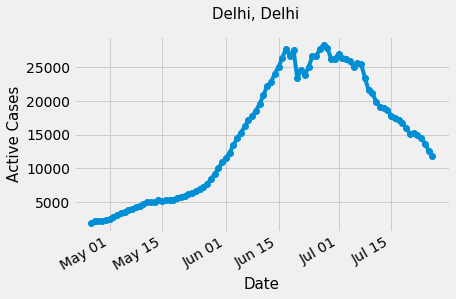

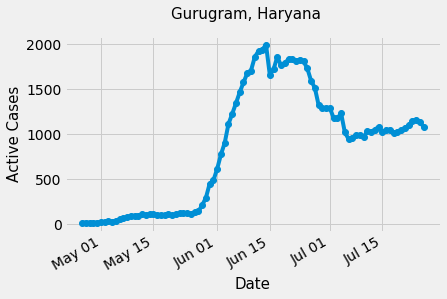

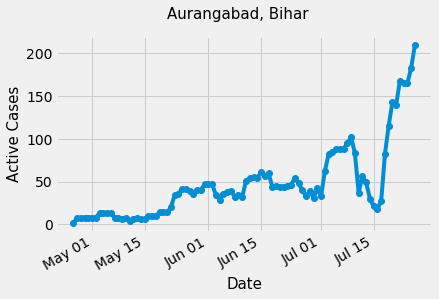

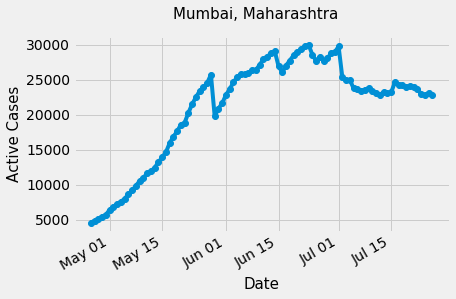

In [10]:
for area in downward:
    fig = plt.figure()
    ax = plt.axes()
    dfcity=df[(df.District==area[1])&(df.State==area[0])]
    x=dfcity["Date"]
    y=dfcity["Confirmed"]-dfcity["Recovered"]-dfcity["Deceased"]
    plt.plot_date(x, y, linestyle="solid")
    plt.gcf().autofmt_xdate()
    date_format = dates.DateFormatter("%b %d")
    plt.gca().xaxis.set_major_formatter(date_format)
    fig.suptitle("{}, {}".format(area[1],area[0]),fontsize=15)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Active Cases',fontsize=15)
    plt.savefig("Downward_Trend/{}.png".format(area[1]), dpi=100, bbox_inches='tight')
    plt.show()

In [7]:
citylist=list(df["District"].unique())
citylist = [city for city in citylist if city not in {"Other Region","Unknown"}]
threshold=-100
upward=[]
total=[]
for city in citylist:
    dfcity=df[df.District==city]
    state=dfcity["State"].unique()[0]
    try:
        monthago=dfcity[dfcity.Date==monthago]["Confirmed"].values[0]-dfcity[dfcity.Date==monthago]["Recovered"].values[0]-dfcity[dfcity.Date==monthago]["Deceased"].values[0]
        total.append(city)
        current=dfcity[dfcity.Date==yesterday]["Confirmed"].values[0]-dfcity[dfcity.Date==yesterday]["Recovered"].values[0]-dfcity[dfcity.Date==yesterday]["Deceased"].values[0]
        if current>2000:
            if monthago==0 and current==0:
                difference=0
            else:
                difference=round(((monthago-current)/monthago)*100,2)
                if difference<threshold:
                    print("State =",state,"| City =",city,"| One Month Ago =",monthago,"| Current =",current,"| Difference =",difference,"%")
                    upward.append([state,city])
                else:
                    pass
        else:
            pass
    except IndexError:
        pass

0 / 1


In [9]:
for area in upward:
    fig = plt.figure()
    ax = plt.axes()
    dfcity=df[(df.District==area[1])&(df.State==area[0])]
    x=dfcity["Date"]
    y=dfcity["Confirmed"]-dfcity["Recovered"]-dfcity["Deceased"]
    plt.plot_date(x, y, linestyle="solid")
    pltgcf().autofmt_xdate()
    date_format = dates.DateFormatter("%b %d")
    plt.gca().xaxis.set_major_formatter(date_format)
    fig.suptitle("{}, {}".format(area[1],area[0]),fontsize=15)
    plt.xlabel('Date',fontsize=15)
    plt.ylabel('Active Cases',fontsize=15)
    plt.savefig("Upward_Trend/{}.png".format(area[1]), dpi=100, bbox_inches='tight')
    plt.show()